# Hard coded classification on spiral toy dataset
***

http://cs231n.github.io/neural-networks-case-study/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hardcoded_ML as ml

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

% matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### Creating the dataset

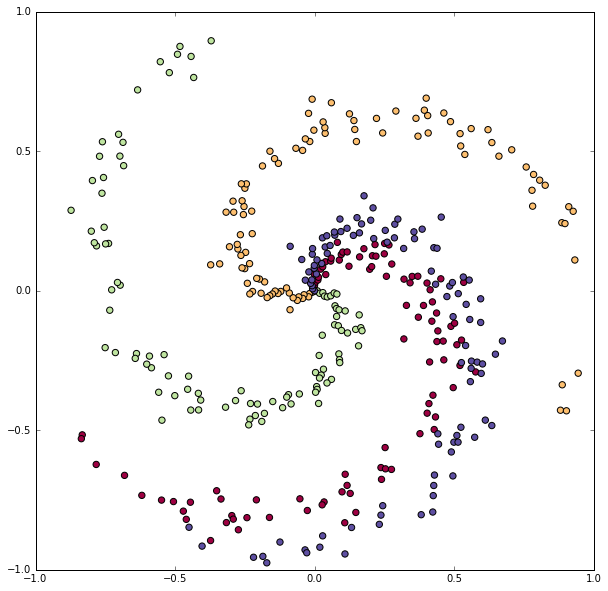

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 4# number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.figure()
plt.axis([-1,1,-1,1])
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [3]:
print(X.shape)
print(y.shape)

(400, 2)
(400,)


In [4]:
def plot_boundaries(W):
    # plot the resulting classifier
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    weights,bias = W[:-1,:],W[-1:,:]
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights)+bias
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

***
### Logistic Regression

In [5]:
LR = ml.LogisticRegression()

... At step 0, the minimum loss is 1.38821
>> Accuracy of 0.1875


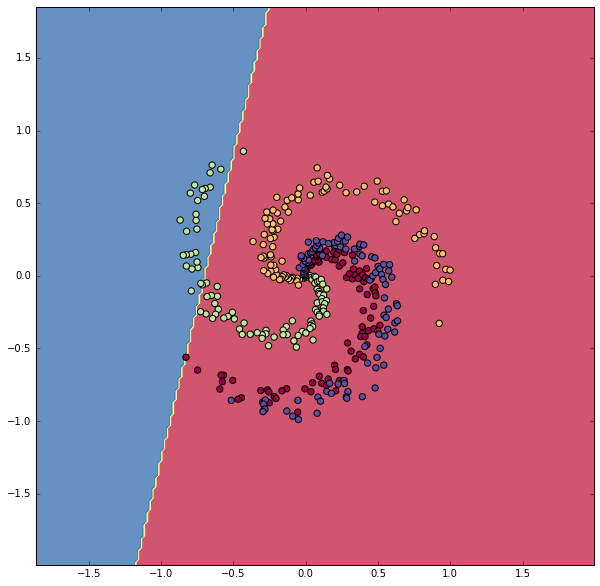

In [6]:
scores = LR.train(X,y,n_steps = 1000,optimization = None)
prediction = LR.predict(X,y)
plot_boundaries(LR.W)

>> Processing random search for 1000 attempts
... At step 0, the minimum loss is 1.38762
... At step 1, the minimum loss is 1.38411
... At step 27, the minimum loss is 1.3835
... At step 30, the minimum loss is 1.38319
... At step 47, the minimum loss is 1.38293
... At step 58, the minimum loss is 1.38239
... At step 100, the minimum loss is 1.38239
... At step 200, the minimum loss is 1.38239
... At step 300, the minimum loss is 1.38239
... At step 400, the minimum loss is 1.38239
... At step 411, the minimum loss is 1.38109
... At step 500, the minimum loss is 1.38109
... At step 600, the minimum loss is 1.38109
... At step 700, the minimum loss is 1.38109
... At step 800, the minimum loss is 1.38109
... At step 900, the minimum loss is 1.38109
>> Updating weights for the best loss found : 1.38109
>> Accuracy of 0.4275


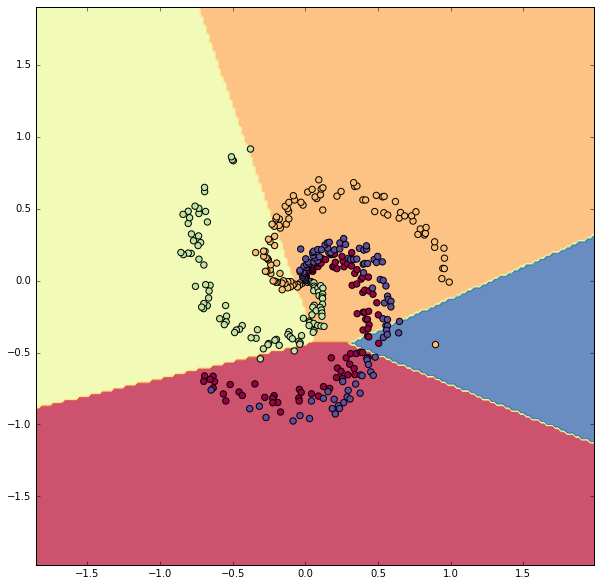

In [15]:
scores = LR.train(X,y,n_steps = 1000,optimization = "random")
prediction = LR.predict(X,y)
plot_boundaries(LR.W)

>> Processing blindfolded hiker optimization for 1000 attempts
... At step 0, the minimum loss is 1.38762
... At step 100, the minimum loss is 1.38701
... At step 200, the minimum loss is 1.38637
... At step 500, the minimum loss is 1.3847
... At step 700, the minimum loss is 1.3834
... At step 800, the minimum loss is 1.38278
>> Updating weights for the best loss found : 1.38164
>> Accuracy of 0.4075


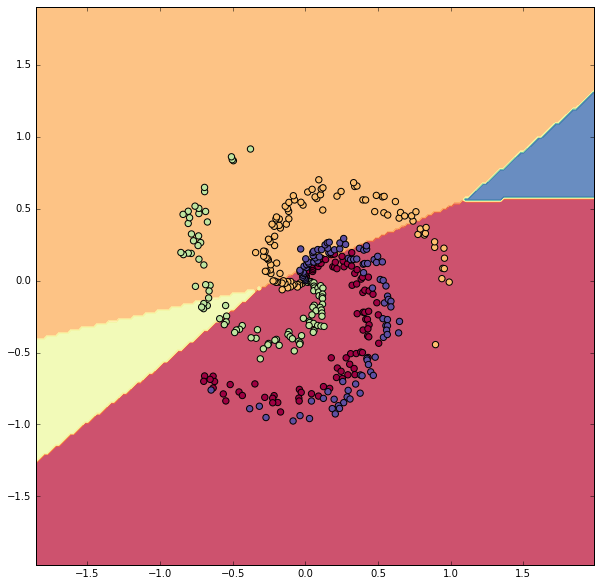

In [16]:
scores = LR.train(X,y,n_steps = 1000,optimization = "blindfolded_hiker")
prediction = LR.predict(X,y)
plot_boundaries(LR.W)

In [18]:
import time

>> Processing gradient descent optimization for 1000 attempts
... At step 0, the loss is 1.38762
... At step 100, the loss is 1.04643
... At step 200, the loss is 1.03893
... At step 300, the loss is 1.03814
... At step 400, the loss is 1.03803
... At step 500, the loss is 1.03801
... At step 600, the loss is 1.03801
... At step 700, the loss is 1.03801
... At step 800, the loss is 1.03801
... At step 900, the loss is 1.03801
>> Updating weights for the last loss found : 1.03801
>> Accuracy of 0.3975
time elapsed : 0.599999904633


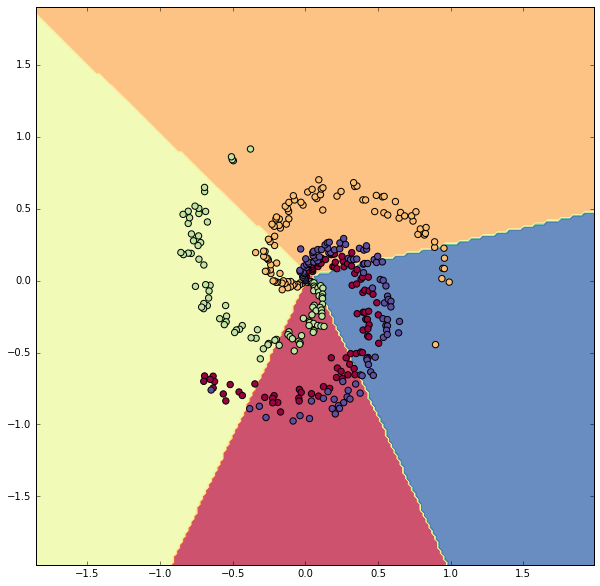

In [20]:
s = time.time()
scores = LR.train(X,y,n_steps = 1000,optimization = "gradient_descent")
prediction = LR.predict(X,y)
e = time.time()
print("time elapsed : %s" % (e-s))
plot_boundaries(LR.W)

>> Processing mini batch gradient descent optimization for 1000 attempts and batch size of 256
... At step 0, the loss is 1.38772
... At step 100, the loss is 1.05434
... At step 200, the loss is 1.04649
... At step 300, the loss is 0.973322
... At step 400, the loss is 1.07417
... At step 500, the loss is 0.978583
... At step 600, the loss is 1.02826
... At step 700, the loss is 1.01453
... At step 800, the loss is 1.03932
... At step 900, the loss is 1.02909
>> Updating weights for the last loss found : 1.02845
>> Accuracy of 0.3925
time elapsed : 0.335000038147


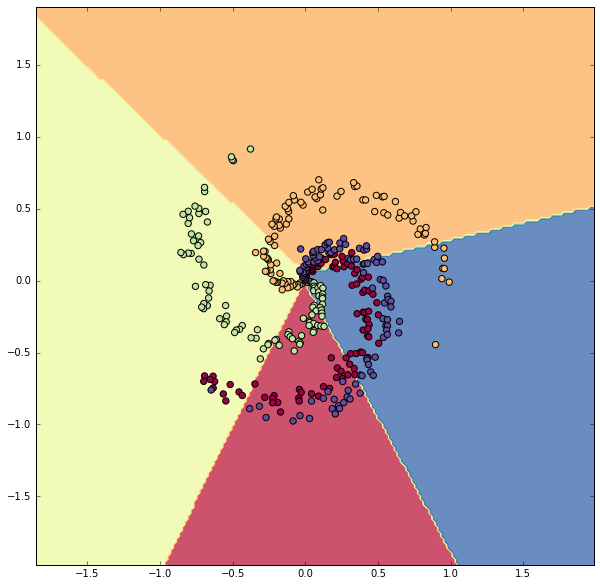

In [42]:
s = time.time()
scores = LR.train(X,y,n_steps = 1000,optimization = "mini_batch_gradient_descent")
prediction = LR.predict(X,y)
e = time.time()
print("time elapsed : %s" % (e-s))
plot_boundaries(LR.W)

***
## Trying with other machine learning algorithms from scikit learn

Let's take a look at decision tree-like algorithms. 

For that we will just use another plot_boundaries function which use the .predict() method of the ML library instead of computing the prediction with the weights. 

In [54]:
def plot_boundaries_model(model,type_model = "keras"):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xy = np.c_[xx.ravel(), yy.ravel()]
    
    if type_model == "keras":
        Z = model.predict(xy)
    elif type_model == "scikit":
        Z = model.predict_proba(xy)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

#### Decision Tree
Starting with a simple decision tree, let's take a look at the influence of the depth of the trees on the boundaries. 

As shown below, a depth of 1 would indeed do a binary decision

0.39


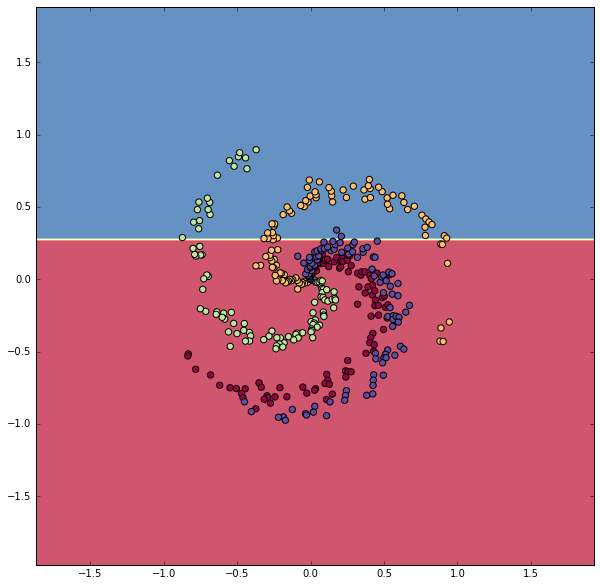

In [61]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth = 1)
DT.fit(X,y)
print(np.mean(DT.predict(X) == y))
plot_boundaries_model(DT,type_model="scikit")

Deeper is the tree, the more we have overfitting of course. 

We can observe that the classifier successively build binary decision blocks which in two dimensions are shaped like multiple rectangles

0.53


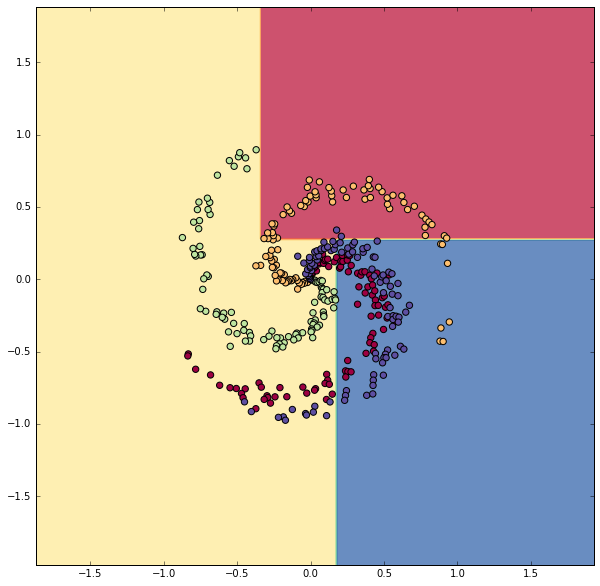

In [62]:
DT = DecisionTreeClassifier(max_depth = 2)
DT.fit(X,y)
print(np.mean(DT.predict(X) == y))
plot_boundaries_model(DT,type_model="scikit")

0.6225


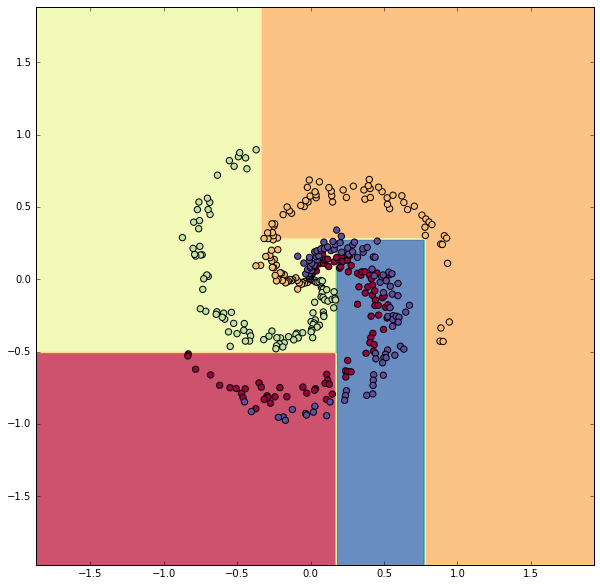

In [64]:
DT = DecisionTreeClassifier(max_depth = 3)
DT.fit(X,y)
print(np.mean(DT.predict(X) == y))
plot_boundaries_model(DT,type_model="scikit")

0.7325


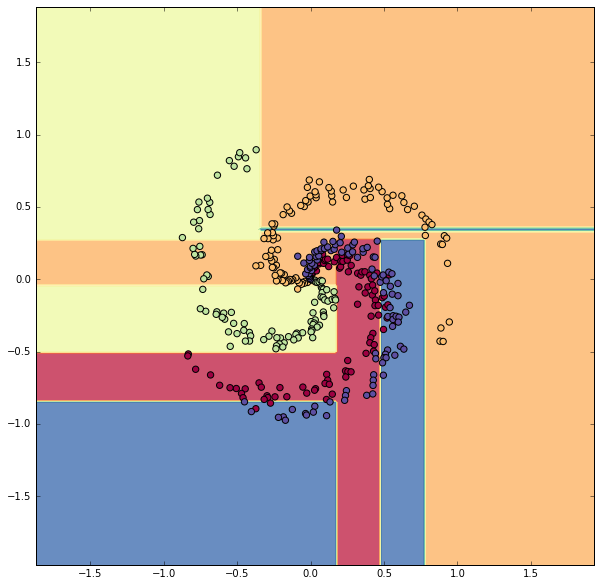

In [65]:
DT = DecisionTreeClassifier(max_depth = 4)
DT.fit(X,y)
print(np.mean(DT.predict(X) == y))
plot_boundaries_model(DT,type_model="scikit")

0.82


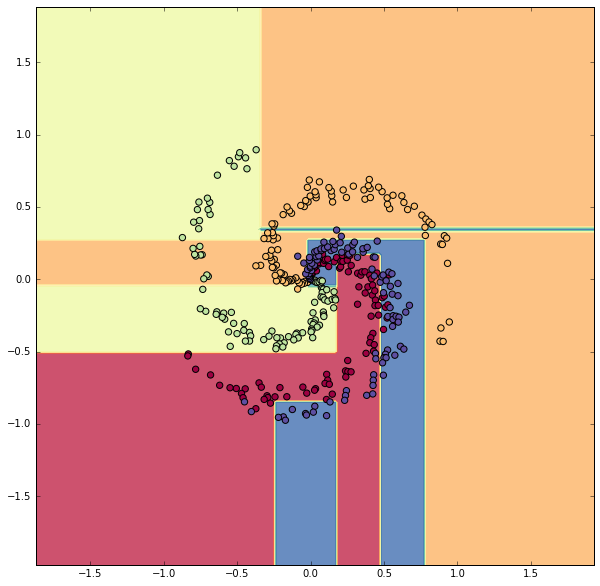

In [66]:
DT = DecisionTreeClassifier(max_depth = 5)
DT.fit(X,y)
print(np.mean(DT.predict(X) == y))
plot_boundaries_model(DT,type_model="scikit")

0.89


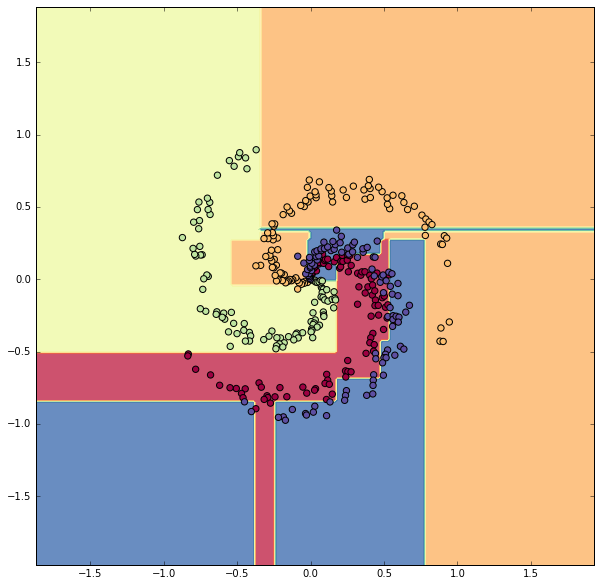

In [67]:
DT = DecisionTreeClassifier(max_depth = 6)
DT.fit(X,y)
print(np.mean(DT.predict(X) == y))
plot_boundaries_model(DT,type_model="scikit")

0.9925


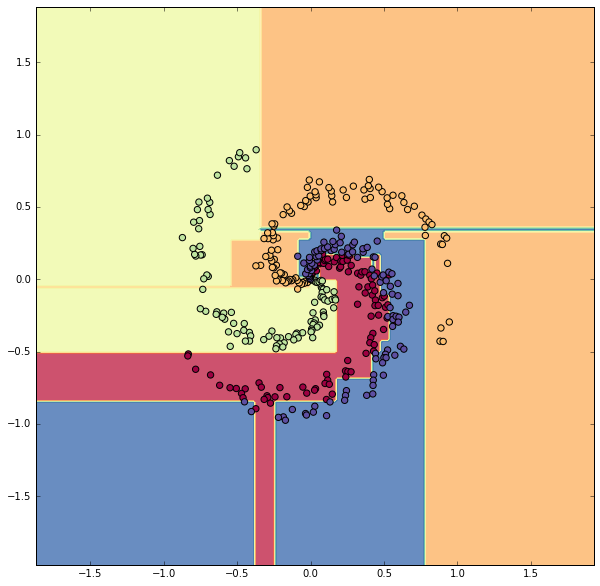

In [68]:
DT = DecisionTreeClassifier()
DT.fit(X,y)
print(np.mean(DT.predict(X) == y))
plot_boundaries_model(DT,type_model="scikit")

#### Random Forests
Same observation for random forests which can also achieve a 99% accuracy on this dataset. 

Nevertheless, as expected the boundaries seem to have more flexibility thanks to the multiple trees, showing pretty well how Random Forests resist to overfitting, even with the deepest trees. 

0.9925


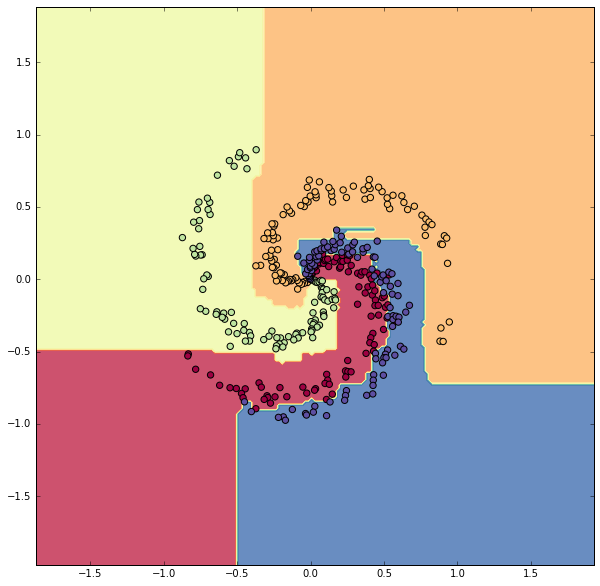

In [75]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=300,max_depth=None)
RF.fit(X,y)
print(np.mean(RF.predict(X) == y))
plot_boundaries_model(RF,type_model="scikit")

***
## Neural Networks
Let's tackle deep learning by building a Neural Network with the Tensorflow and the framework Keras. 

In [76]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

With Keras, you must use categorical one hot class vector for the target variable.

Which you can build with np_utils in Keras

In [77]:
nb_classes = 4
Y = np_utils.to_categorical(y, nb_classes)
Y

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.]])

##### 1. Simple network
I built a fully connected feed forward network with 2 layers of size 100, with ReLu activations.

In [78]:
model = Sequential()
model.add(Dense(100, input_dim=2))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [79]:
model.fit(X,Y, nb_epoch=20, batch_size=32)

Epoch 1/20
400/400 [==============================] - 0s - loss: 1.3282 - acc: 0.3950     
Epoch 2/20
400/400 [==============================] - 0s - loss: 1.1513 - acc: 0.4400     
Epoch 3/20
400/400 [==============================] - 0s - loss: 1.0323 - acc: 0.4700     
Epoch 4/20
400/400 [==============================] - 0s - loss: 0.9671 - acc: 0.4900     
Epoch 5/20
400/400 [==============================] - 0s - loss: 0.8647 - acc: 0.6100     
Epoch 6/20
400/400 [==============================] - 0s - loss: 0.7441 - acc: 0.6600     
Epoch 7/20
400/400 [==============================] - 0s - loss: 0.6640 - acc: 0.7175     
Epoch 8/20
400/400 [==============================] - 0s - loss: 0.5397 - acc: 0.7825     
Epoch 9/20
400/400 [==============================] - 0s - loss: 0.5029 - acc: 0.7925     
Epoch 10/20
400/400 [==============================] - 0s - loss: 0.4879 - acc: 0.7650     
Epoch 11/20
400/400 [==============================] - 0s - loss: 0.4284 - acc: 0.8050   

In [80]:
model.evaluate(X,Y)

352/400 [=========================>....] - ETA: 0s

[0.40697937441989779, 0.82750000000000001]

And already with this very simple network, we can graphically observe the effectiveness of Neural Networks

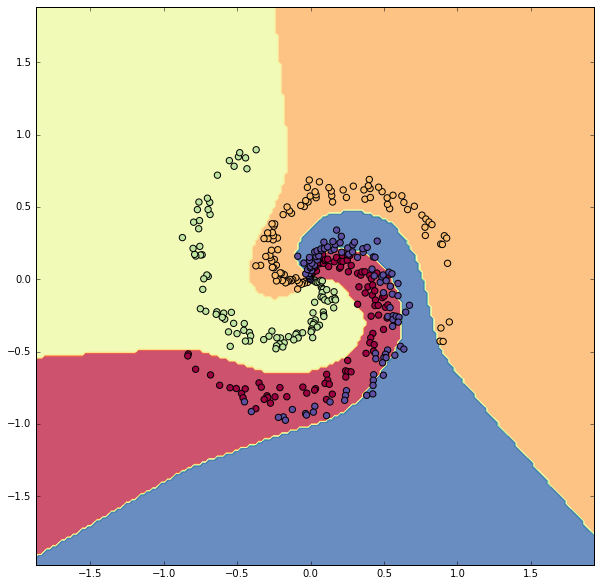

In [82]:
plot_boundaries_model(model)

Let's look at how well the network performs during training, and how the boundaries change. 

Trying that with a more complex and bigger fully connected network (with dropout regularization)

In [89]:
model = Sequential()
model.add(Dense(400, input_dim=2))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(400))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(4))
model.add(Activation('softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

Epoch 1/1
400/400 [==============================] - 0s - loss: 1.3363 - acc: 0.3275     


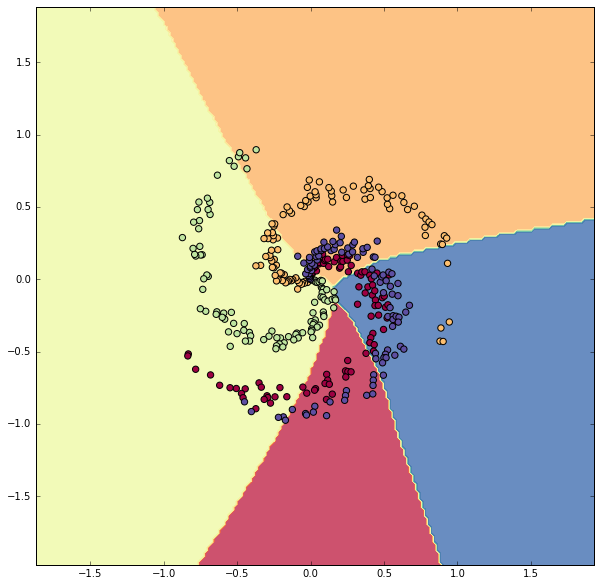

In [90]:
model.fit(X,Y, nb_epoch=1, batch_size=32)
plot_boundaries_model(model)

Epoch 1/1
400/400 [==============================] - 0s - loss: 1.1405 - acc: 0.4575     


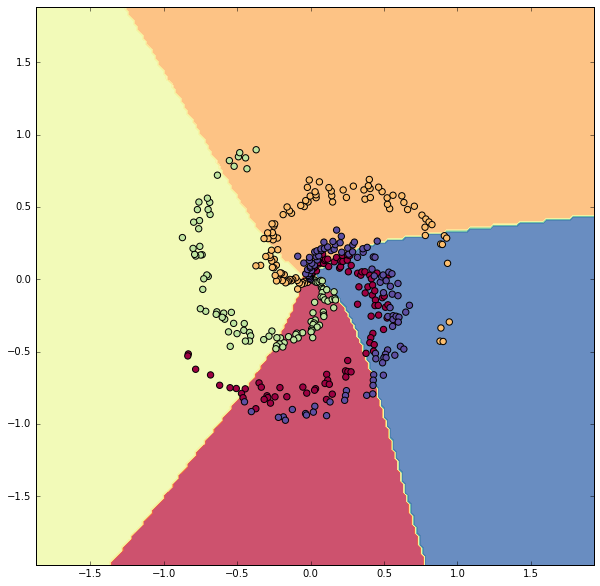

In [91]:
model.fit(X,Y, nb_epoch=1, batch_size=32)
plot_boundaries_model(model)

Epoch 1/1
400/400 [==============================] - 0s - loss: 1.0499 - acc: 0.4575     


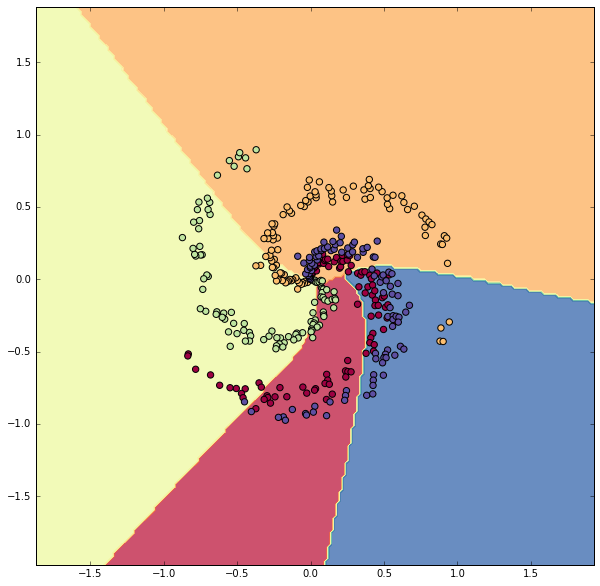

In [92]:
model.fit(X,Y, nb_epoch=1, batch_size=32)
plot_boundaries_model(model)

Epoch 1/1
400/400 [==============================] - 0s - loss: 0.9935 - acc: 0.4925     


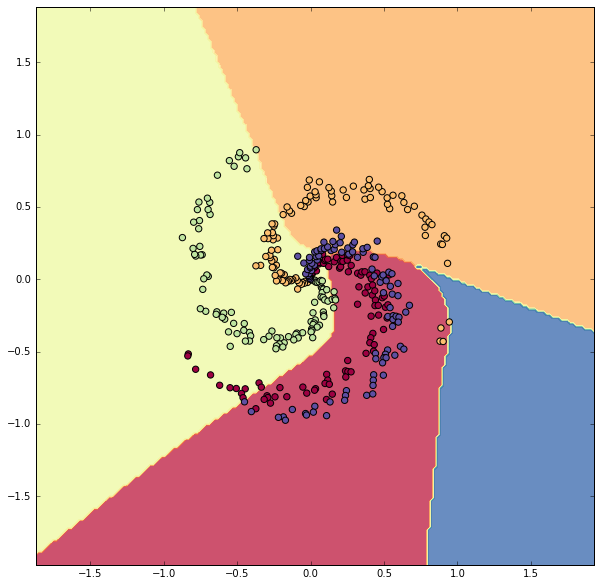

In [93]:
model.fit(X,Y, nb_epoch=1, batch_size=32)
plot_boundaries_model(model)

Epoch 1/1
400/400 [==============================] - 0s - loss: 0.9257 - acc: 0.5525     


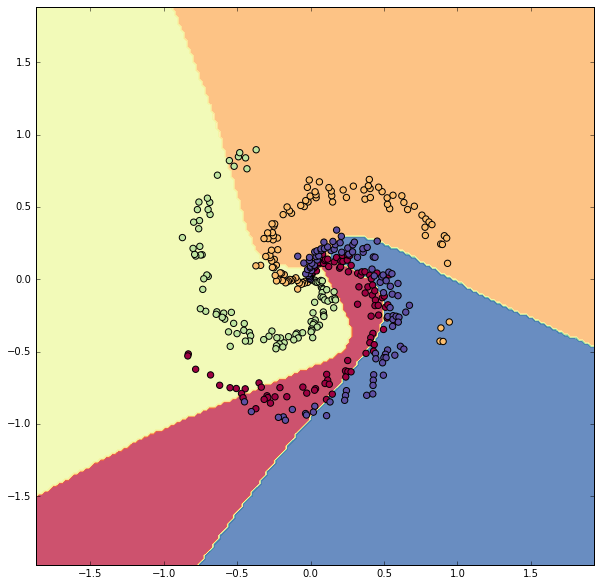

In [94]:
model.fit(X,Y, nb_epoch=1, batch_size=32)
plot_boundaries_model(model)

Epoch 1/1
400/400 [==============================] - 0s - loss: 0.8255 - acc: 0.6225     


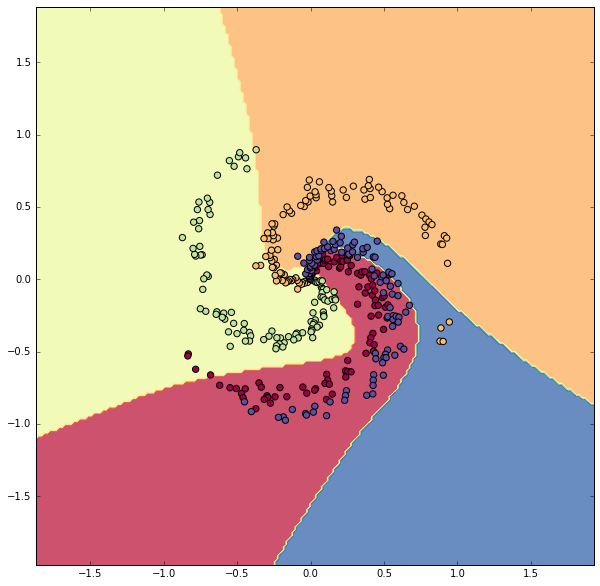

In [95]:
model.fit(X,Y, nb_epoch=1, batch_size=32)
plot_boundaries_model(model)

Epoch 1/1
400/400 [==============================] - 0s - loss: 0.7302 - acc: 0.6375     


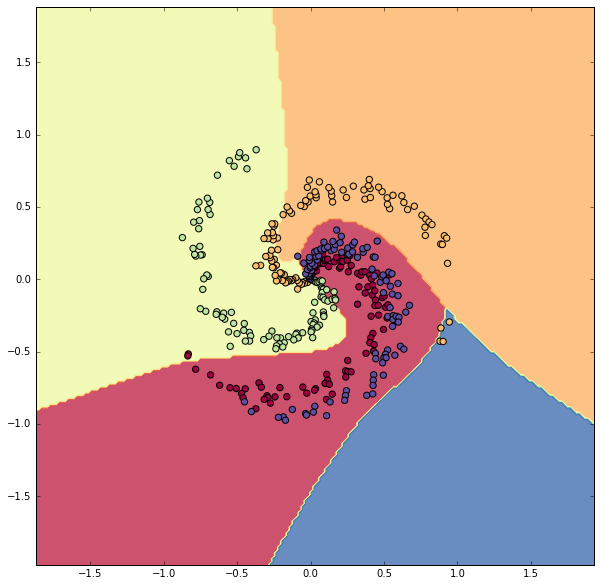

In [96]:
model.fit(X,Y, nb_epoch=1, batch_size=32)
plot_boundaries_model(model)

Epoch 1/5
400/400 [==============================] - 0s - loss: 0.6813 - acc: 0.7025     
Epoch 2/5
400/400 [==============================] - 0s - loss: 0.5740 - acc: 0.7650     
Epoch 3/5
400/400 [==============================] - 0s - loss: 0.5545 - acc: 0.7450     
Epoch 4/5
400/400 [==============================] - 0s - loss: 0.4822 - acc: 0.7750     
Epoch 5/5
400/400 [==============================] - 0s - loss: 0.4440 - acc: 0.8100     


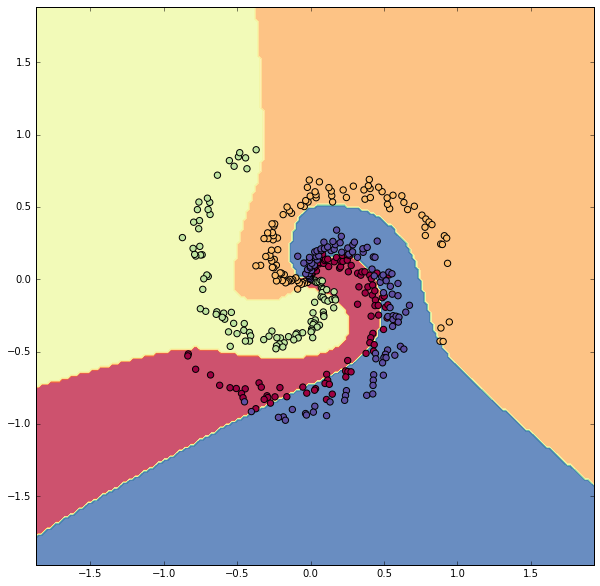

In [97]:
model.fit(X,Y, nb_epoch=5, batch_size=32)
plot_boundaries_model(model)

Epoch 1/5
400/400 [==============================] - 0s - loss: 0.4282 - acc: 0.8300     
Epoch 2/5
400/400 [==============================] - 0s - loss: 0.4300 - acc: 0.8100     
Epoch 3/5
400/400 [==============================] - 0s - loss: 0.3932 - acc: 0.8125     
Epoch 4/5
400/400 [==============================] - 0s - loss: 0.4245 - acc: 0.8225     
Epoch 5/5
400/400 [==============================] - 0s - loss: 0.3744 - acc: 0.8500     


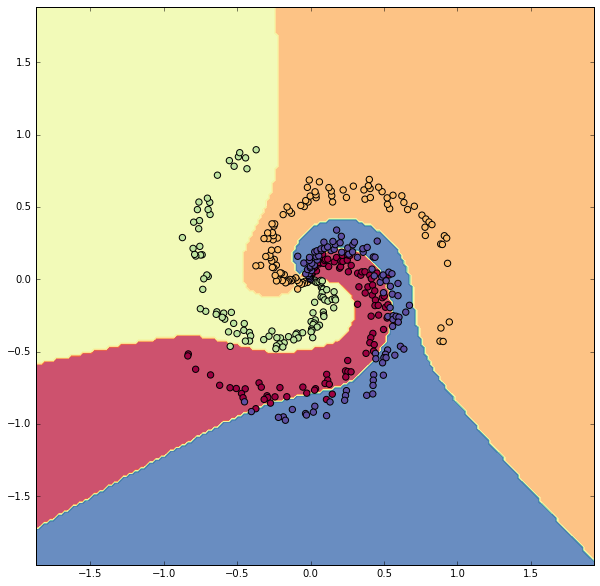

In [99]:
model.fit(X,Y, nb_epoch=5, batch_size=32)
plot_boundaries_model(model)